# Dataset

In [1]:
import pandas as pd
path = '/content/AAPL.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [2]:
df1 = df.reset_index()['close']
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

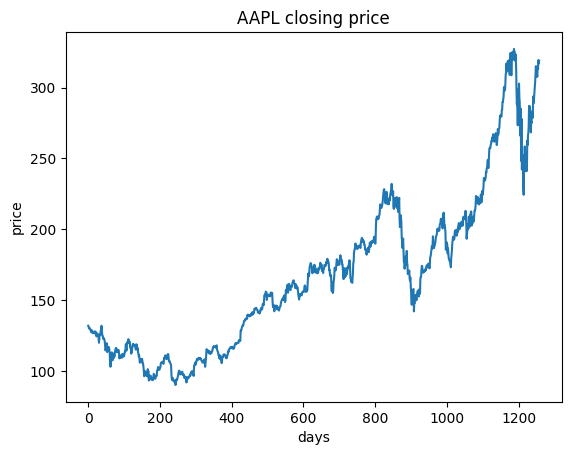

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title('AAPL closing price')
plt.xlabel('days')
plt.ylabel('price')
plt.show()

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [10]:
train_size = int(len(df1) * 0.70)
test_size = len(df1) - train_size
train_data = df1[0:train_size, :]
test_data = df1[train_size: , :]

In [11]:
test_data

array([[0.3657857 ],
       [0.36494132],
       [0.34598497],
       [0.355822  ],
       [0.35421768],
       [0.38250443],
       [0.37663599],
       [0.37254074],
       [0.39888542],
       [0.36456134],
       [0.35624419],
       [0.32994174],
       [0.33462805],
       [0.3305328 ],
       [0.3325171 ],
       [0.34032762],
       [0.31723381],
       [0.31073208],
       [0.31972473],
       [0.29785527],
       [0.28071435],
       [0.25496074],
       [0.23849531],
       [0.28214979],
       [0.27784345],
       [0.2781812 ],
       [0.28455628],
       [0.28531622],
       [0.21890568],
       [0.24453264],
       [0.24313941],
       [0.25504517],
       [0.26585325],
       [0.26792198],
       [0.26154691],
       [0.25187875],
       [0.26483999],
       [0.27273495],
       [0.2766191 ],
       [0.28067213],
       [0.26581103],
       [0.26842861],
       [0.26327789],
       [0.28464072],
       [0.27847674],
       [0.27163725],
       [0.31626277],
       [0.321

In [17]:
from datetime import time
def data_set(dataset, time_step=1):
  X = []
  Y = []
  for i in range(len(dataset)-time_step-1):
    x_data = dataset[i:(i+time_step), 0]
    y_data = dataset[i+time_step+1, 0]
    X.append(x_data)
    Y.append(y_data)
  return np.array(X), np.array(Y)

In [39]:
X_train,y_train = data_set(train_data, 100)
X_test,y_test = data_set(test_data, 100)

In [40]:
X_train.reshape(-1, 100, 1)
X_test.reshape(-1, 100, 1)

array([[[0.3657857 ],
        [0.36494132],
        [0.34598497],
        ...,
        [0.45820316],
        [0.45972304],
        [0.45980748]],

       [[0.36494132],
        [0.34598497],
        [0.355822  ],
        ...,
        [0.45972304],
        [0.45980748],
        [0.47618847]],

       [[0.34598497],
        [0.355822  ],
        [0.35421768],
        ...,
        [0.45980748],
        [0.47618847],
        [0.47927046]],

       ...,

       [[0.81875369],
        [0.84256523],
        [0.84210082],
        ...,
        [0.92544119],
        [0.91771511],
        [0.9483239 ]],

       [[0.84256523],
        [0.84210082],
        [0.84936249],
        ...,
        [0.91771511],
        [0.9483239 ],
        [0.94064004]],

       [[0.84210082],
        [0.84936249],
        [0.85835515],
        ...,
        [0.9483239 ],
        [0.94064004],
        [0.96635143]]])

# Model

In [23]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 4s 145ms/step - loss: 3.6136e-04
Epoch 2/50
25/25 [==============================] - 3s 129ms/step - loss: 3.4995e-04
Epoch 3/50
25/25 [==============================] - 3s 125ms/step - loss: 3.3385e-04
Epoch 4/50
25/25 [==============================] - 4s 143ms/step - loss: 3.1473e-04
Epoch 5/50
25/25 [==============================] - 3s 130ms/step - loss: 3.6322e-04
Epoch 6/50
25/25 [==============================] - 3s 126ms/step - loss: 3.2270e-04
Epoch 7/50
25/25 [==============================] - 3s 120ms/step - loss: 3.1016e-04
Epoch 8/50
25/25 [==============================] - 3s 119ms/step - loss: 3.0749e-04
Epoch 9/50
25/25 [==============================] - 3s 133ms/step - loss: 2.8865e-04
Epoch 10/50
25/25 [==============================] - 3s 113ms/step - loss: 2.7296e-04
Epoch 11/50
25/25 [==============================] - 3s 108ms/step - loss: 3.0519e-04
Epoch 12/50
25/25 [==============================] - 3s 119ms/s

# Testing

In [42]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 48ms/step


In [43]:
y_prediced = scaler.inverse_transform(y_pred)

In [44]:
import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(y_test,y_prediced))
print(RMSE)

242.61414504839027


# Plot

In [45]:
len(train_predict)

779

25/25 [==============================] - 1s 38ms/step


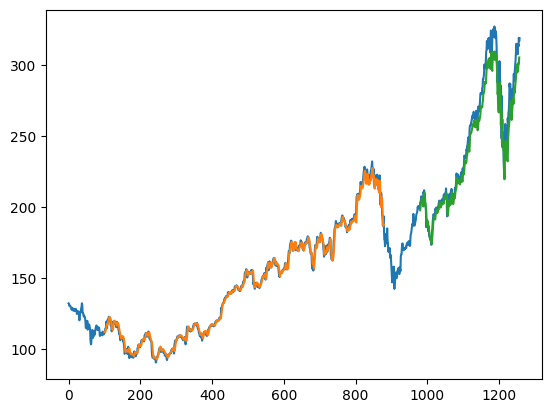

In [46]:
train_predict = scaler.inverse_transform(model.predict(X_train))
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[100:len(train_predict)+100, :] = train_predict

test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(100*2)+1:len(df1)-1, :] = y_prediced

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()